In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import scipy.stats as stats
import scipy
import seaborn as sns
import numpy as np
from pydataset import data
from env import get_db_url

***Exercises***

Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

**Has the network latency gone up since we switched internet service providers?**


H0: The network latency has remained the same

Ha: The network latency has increased since ISP change


**Is the website redesign any good?**


H0: Website reviews have stayed the same

HA: Website reviews have improved since 'x'


**Is our television ad driving more sales?**

H0: Sales are unchanged post ad

HA: Sales have increased post ad

**T-Test Exercises**
Continue working in your hypothesis_testing notebook.



Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.


In [3]:
#H0 : Sales are the same in each office
#HA : Sales are different for each office
# two tailed with ⍺= 0.05
 
mean_o_1 = 90
std_o_1 = 15
sample_size_01 = 40
mean_o_2 = 100
std_o_2 = 20
sample_size_02 = 50

t,p = stats.ttest_ind_from_stats(mean_o_1,std_o_1, sample_size_01,mean_o_2,std_o_2,sample_size_02,equal_var=False)
t, p

#p is less than ɑ therefor reject H0

(-2.7091418459143854, 0.00811206270346016)


Load the mpg dataset and use it to answer the following questions:


In [4]:
mpg = data ('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact



Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


In [5]:
#make a column for avg mpg
mpg['avg_mpg'] = (mpg['cty']+mpg['hwy'])/2

In [6]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [7]:
avg_mpg_99 = mpg[mpg.year == 1999].avg_mpg
cty_mpg_99 = mpg[mpg.year == 1999].cty
hwy_mpg_99 = mpg[mpg.year == 1999].hwy
avg_mpg_08 = mpg[mpg.year == 2008].avg_mpg
cty_mpg_08 = mpg[mpg.year == 2008].cty
hwy_mpg_08 = mpg[mpg.year == 2008].hwy

((array([ 7.,  3., 30.,  6., 15., 15., 25., 10.,  2.,  4.]),
  array([12. , 14.5, 17. , 19.5, 22. , 24.5, 27. , 29.5, 32. , 34.5, 37. ]),
  <BarContainer object of 10 artists>),
 (10.0, 45.0),
 Text(0.5, 1.0, 'hwy mpg 08'))

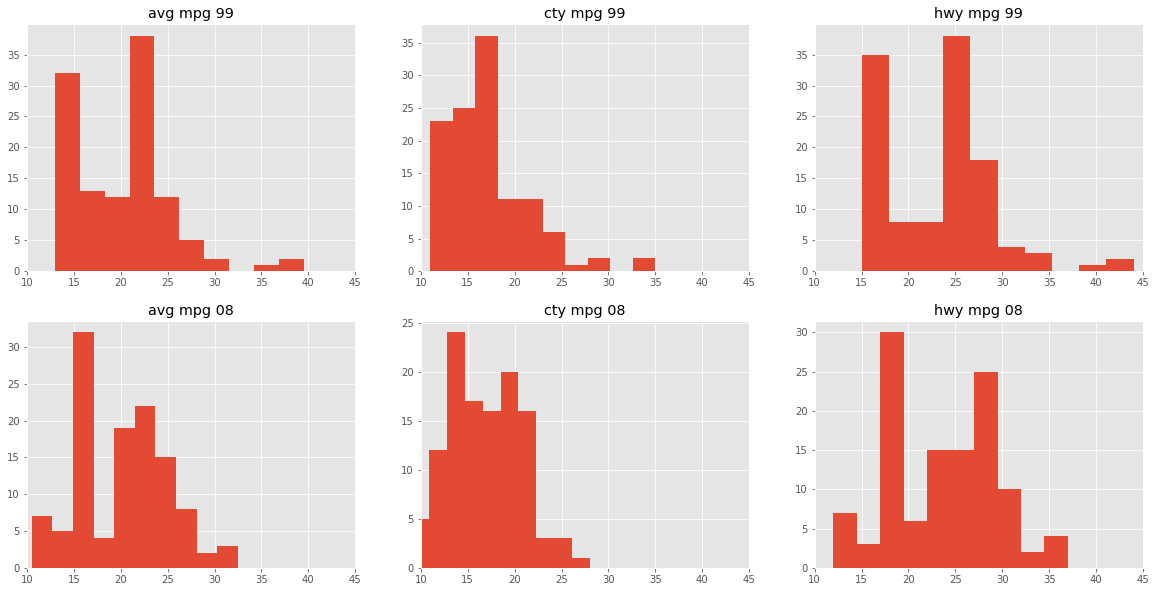

In [8]:
plt.figure(figsize = (20,10))
x = (10,45)

plt.subplot(2,3,1)
plt.hist(avg_mpg_99), plt.xlim(x) , plt.title('avg mpg 99')
plt.subplot(2,3,2)
plt.hist(cty_mpg_99) , plt.xlim(x) , plt.title('cty mpg 99')
plt.subplot(2,3,3)
plt.hist(hwy_mpg_99) , plt.xlim(x) , plt.title('hwy mpg 99')
plt.subplot(2,3,4)
plt.hist(avg_mpg_08) , plt.xlim(x) , plt.title('avg mpg 08')
plt.subplot(2,3,5)
plt.hist(cty_mpg_08), plt.xlim(x) , plt.title('cty mpg 08')
plt.subplot(2,3,6)
plt.hist(hwy_mpg_08) , plt.xlim(x) , plt.title('hwy mpg 08')

In [9]:
#it appears there is a difference rather you measure, city, hwy, or avg
t, p = stats.ttest_ind(avg_mpg_99, avg_mpg_08 )
t, p
# two tailed, compare p to ɑ, p>ɑ, reject null, there is a difference

(0.21960177245940962, 0.8263744040323578)

Are compact cars more fuel-efficient than the average car?


In [10]:
# H0 : compact cars mpg =< average
# HA : compact cars  mpg > avevage

In [11]:
compact = mpg[mpg['class'] == 'compact'].avg_mpg
average = mpg.avg_mpg

((array([17., 51., 30., 57., 36., 29., 10.,  1.,  1.,  2.]),
  array([10.5, 13.4, 16.3, 19.2, 22.1, 25. , 27.9, 30.8, 33.7, 36.6, 39.5]),
  <BarContainer object of 10 artists>),
 (10.0, 40.0),
 Text(0.5, 1.0, 'average'))

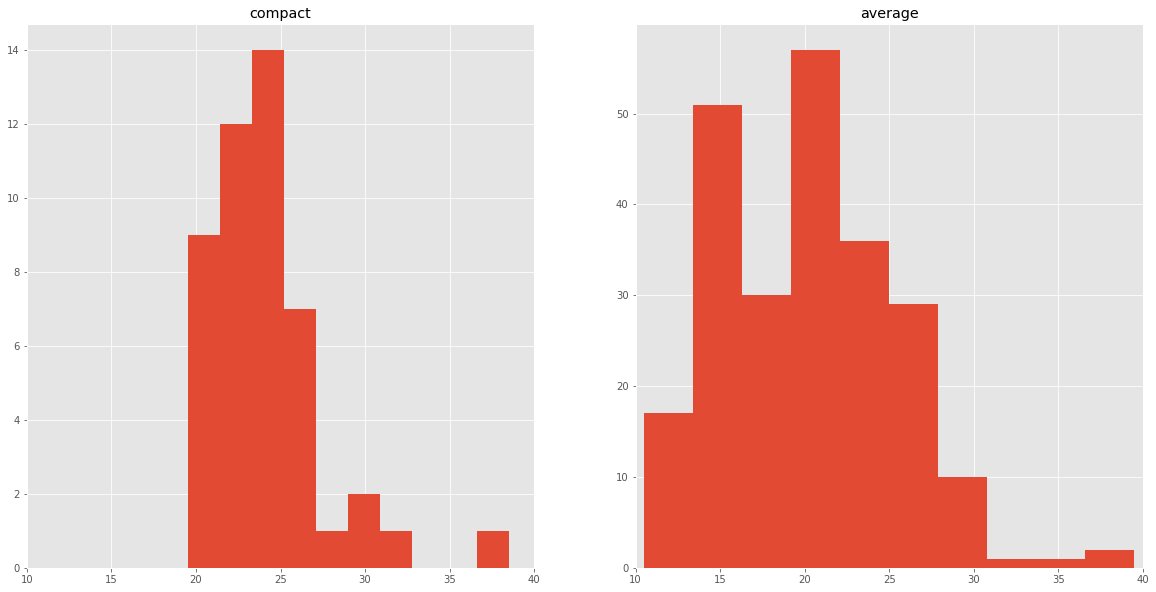

In [12]:
plt.figure(figsize = (20,10))
x = (10,40)
plt.subplot(1,2,1)
plt.hist(compact), plt.xlim(x), plt.title('compact')
plt.subplot(1,2,2)
plt.hist(average), plt.xlim(x), plt.title('average')

In [13]:
# appears compacts are more efficient from the graph
t, p = stats.ttest_ind(compact, average )
t, p/2
# one tailed, compare p/2 to ɑ, p/2<ɑ & t >0, confirm null,
#  compacts are more effiecent

(5.260311926248542, 1.4342273079064686e-07)

Do manual cars get better gas mileage than automatic cars?

In [14]:
# H0 : manual cars mpg =< auto
# HA : manual cars  mpg > auto

In [15]:
manual = mpg[mpg['trans'].str.contains('auto')].avg_mpg
auto = mpg[mpg['trans'].str.contains('manual')].avg_mpg

((array([ 1., 10.,  8., 22., 10., 19.,  4.,  1.,  0.,  2.]),
  array([10.5, 13.4, 16.3, 19.2, 22.1, 25. , 27.9, 30.8, 33.7, 36.6, 39.5]),
  <BarContainer object of 10 artists>),
 (10.0, 40.0),
 Text(0.5, 1.0, 'auto'))

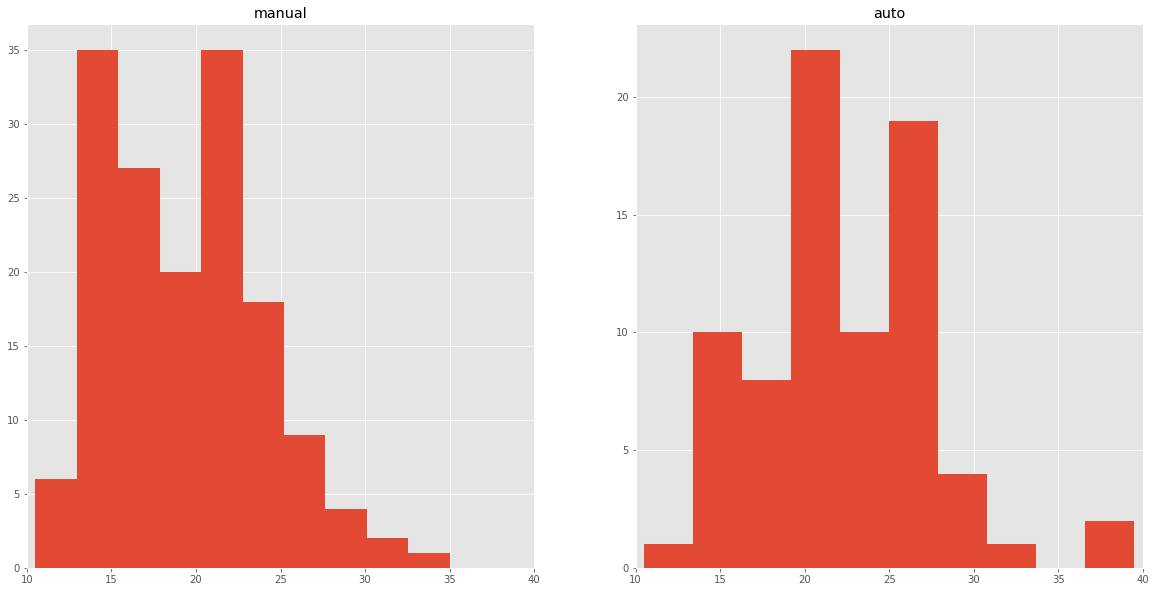

In [16]:
plt.figure(figsize = (20,10))
x = (10,40)
plt.subplot(1,2,1)
plt.hist(manual), plt.xlim(x), plt.title('manual')
plt.subplot(1,2,2)
plt.hist(auto), plt.xlim(x), plt.title('auto')

In [17]:
# appears automatics are more efficient from the graph
t, p = stats.ttest_ind(manual, auto)
t, p/2
# one tailed, compare p/2 to ɑ, p/2<ɑ, however, t <0, reject null,
# automatics are more effiecent

(-4.593437735750014, 3.5771872005728416e-06)

Text(0, 0.5, 'average mpg')

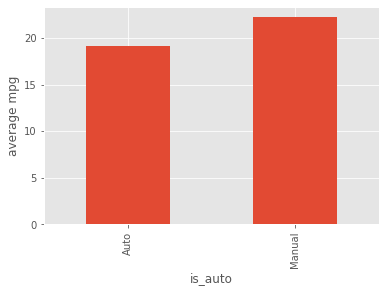

In [18]:
#more proof
mpg['is_auto'] = np.where(mpg.trans.str.contains('auto'), 'Auto', 'Manual')
mpg.groupby('is_auto').avg_mpg.mean().plot.bar()
plt.ylabel('average mpg')

**Correlation Exercises**


Continue working in your hypothesis_testing notebook.

Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?


In [19]:
telco = pd.read_csv('telco_churn.csv')
telco = telco.dropna()
telco.columns

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'partner_dependents', 'phone_service', 'has_phone', 'phone',
       'internet_service', 'has_internet', 'internet',
       'has_phone_and_internet', 'service_type', 'contract_type', 'contract',
       'payment_type', 'Pay_number', 'auto_pay', 'monthly_charges',
       'total_charges', 'churn', 'is_female', 'has_churned', 'tenure',
       'months_tenure'],
      dtype='object')

In [20]:
# 𝐻𝑜 : tenure and monthly charges are not linearly correlated
# 𝐻𝑎 : tenure and monthly charges are linearly correlated

r, p = stats.pearsonr(telco.months_tenure, telco.monthly_charges)
r, p

#reject the H0, 

(0.24580725896007333, 2.3212845018030626e-97)

In [21]:
# 𝐻𝑜 : tenure and TOTAL charges are not linearly correlated
# 𝐻𝑎 : tenure and TOTAL charges are linearly correlated

r, p = stats.pearsonr(telco.months_tenure, telco.total_charges)
r, p

#reject the H0, 

(0.8257946976871812, 0.0)

In [22]:
telco['phone_and_internet_types'] = telco.phone + ' & ' + telco.internet
telco.phone_and_internet_types.value_counts()

Two or More Lines & Fiber Optic            1938
One Line & No Internet Service             1183
One Line & Fiber Optic                     1160
One Line & DSL                             1047
Two or More Lines & DSL                     689
No Phone Service & DSL                      681
Two or More Lines & No Internet Service     340
Name: phone_and_internet_types, dtype: int64

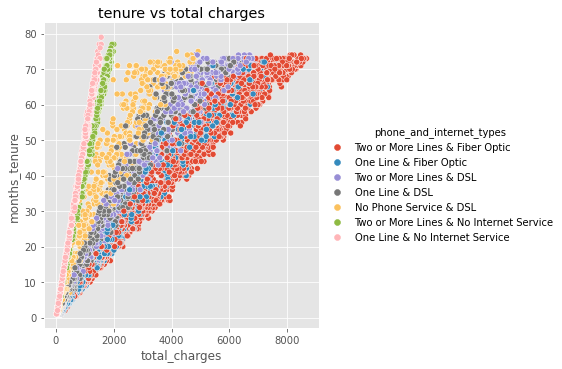

In [23]:
sns.relplot(data=telco, y='months_tenure', x='total_charges', hue='phone_and_internet_types')
#visually its very clear the correlation still exists when controlling for phone and internet
plt.title('tenure vs total charges')
plt.savefig('months-vs-total-charges.png')

In [24]:
options = telco.phone_and_internet_types.value_counts().index
for option in options:
    telco_corrected = telco[telco.phone_and_internet_types == option]
    r, p = stats.pearsonr(telco_corrected.months_tenure, telco_corrected.total_charges)
    print(f'{option} r: {r=:.4f}, p: {p=:.4f}')

#reject them all!

Two or More Lines & Fiber Optic r: r=0.9838, p: p=0.0000
One Line & No Internet Service r: r=0.9992, p: p=0.0000
One Line & Fiber Optic r: r=0.9875, p: p=0.0000
One Line & DSL r: r=0.9745, p: p=0.0000
Two or More Lines & DSL r: r=0.9672, p: p=0.0000
No Phone Service & DSL r: r=0.9547, p: p=0.0000
Two or More Lines & No Internet Service r: r=0.9980, p: p=0.0000


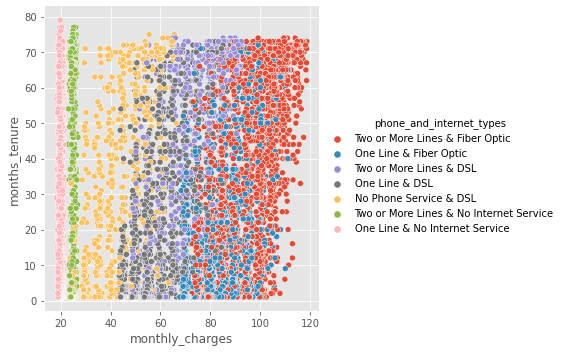

In [25]:
sns.relplot(data=telco, y='months_tenure', x='monthly_charges', hue='phone_and_internet_types')
#visually its very clear the correlation still exists when controlling for phone and internet

In [26]:
options = telco.phone_and_internet_types.value_counts().index
for option in options:
    telco_corrected = telco[telco.phone_and_internet_types == option]
    r, p = stats.pearsonr(telco_corrected.months_tenure, telco_corrected.monthly_charges)
    print(f'{option} r: {r=:.4f}, p: {p=:.4f}')

# fail to reject on 'One Line & No Internet Service'
#  and 'Two or More Lines & No Internet Service'

Two or More Lines & Fiber Optic r: r=0.5733, p: p=0.0000
One Line & No Internet Service r: r=-0.0133, p: p=0.6466
One Line & Fiber Optic r: r=0.5287, p: p=0.0000
One Line & DSL r: r=0.5620, p: p=0.0000
Two or More Lines & DSL r: r=0.6104, p: p=0.0000
No Phone Service & DSL r: r=0.5929, p: p=0.0000
Two or More Lines & No Internet Service r: r=-0.0313, p: p=0.5651


Use the employees database.

In [27]:
url = get_db_url('employees')
employees = pd.read_sql('''
SELECT datediff(curdate(), hire_date) as days_worked, salary
FROM employees
JOIN salaries using(emp_no)
WHERE to_date > now()
''', url)

In [28]:
employees.head()

,days_worked,salary
0,13025,88958
1,13242,72527
2,12962,43311
3,12867,74057
4,11851,94692


Is there a relationship between how long an employee has been with the company and their salary?


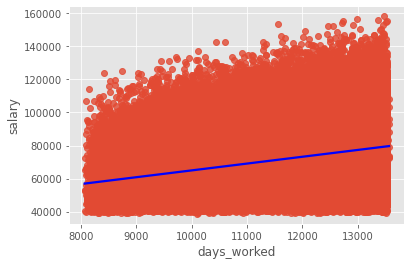

In [29]:
sns.regplot(data = employees, x = 'days_worked', y = 'salary', line_kws={"color": "blue"})
plt.savefig('tenure-vs-salary.png')

In [30]:
# H0: There is not a linear correlation between employee tenure and salary
# Ha: There is a linear correlation between employee tenure and salary

r, p = stats.pearsonr(employees.days_worked, employees.salary)
r, p

#reject null

(0.3064625613186077, 0.0)

Is there a relationship between how long an employee has been with the company and the number of titles they have had?


In [31]:
url = get_db_url('employees')
employees = pd.read_sql('''
SELECT datediff(curdate(), hire_date) as days_worked, count(title) as titles
FROM employees
JOIN titles using(emp_no)
GROUP BY emp_no
''', url)

<AxesSubplot:xlabel='days_worked', ylabel='titles'>

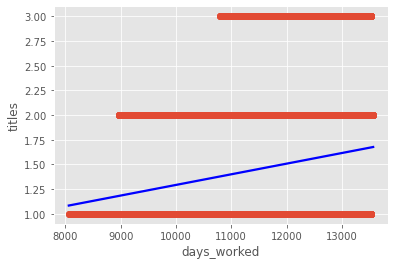

In [32]:
sns.regplot(data = employees, x = 'days_worked', y = 'titles', line_kws={"color": "blue"})

In [33]:
# H0: There is not a linear correlation between employee tenure and titles held
# Ha: There is a linear correlation between employee tenure and titles held

r, p = stats.pearsonr(employees.days_worked, employees.titles)
r, p

#reject null

(0.26659892991366185, 0.0)

Use the sleepstudy data. Is there a relationship between days and reaction time?

In [34]:
sleepstudy = data('sleepstudy')

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

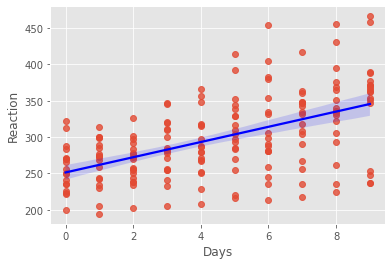

In [35]:
sns.regplot(data = sleepstudy, x = 'Days', y = 'Reaction', line_kws={"color": "blue"})

In [36]:
# H0: There is not a linear correlation between days and reaction time
# Ha: There is a linear correlation between days and reaction time

r, p = stats.pearsonr(sleepstudy.Days, sleepstudy.Reaction)
r, p

#reject null

(0.5352302262650253, 9.894096322214812e-15)

# Chi squared Exercises


Continue working in your hypothesis_testing notebook.

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

 				Codeup Student	Not Codeup Student
	 
Uses a Macbook			49			20

Doesn't Use A Macbook	1			30


In [39]:
mac_codeup = pd.DataFrame({'yes_codeup': [49,1], 'no_codeup': [20,30]}, index=['yes_macbook', 'no_macbook'])
mac_codeup


,yes_codeup,no_codeup
yes_macbook,49,20
no_macbook,1,30


In [41]:
alpha = 0.05
chi2, p, degf, expected = stats.chi2_contingency(mac_codeup)


In [43]:
print('Observed\n')
print(mac_codeup.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34 34]
 [15 15]]
---

chi^2 = 36.6526
p     = 0.0000




Choose another 2 categorical variables from the mpg dataset and perform a 
$chi^2$
 contingency table test with them. Be sure to state your null and alternative hypotheses.

$- H0:$ There is no association between class and year  

$- Ha:$ There is a association between class and year

In [57]:
mpg_chi = pd.crosstab(mpg.year, mpg['class'])
mpg_chi

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
year,,,,,,,
1999,2,25,20,6,16,19,29
2008,3,22,21,5,17,16,33


In [63]:
chi2, p, degf, expected = stats.chi2_contingency(mpg_chi)
print('Observed\n')
print(mpg_chi.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
# fail to reject null


Observed

[[ 2 25 20  6 16 19 29]
 [ 3 22 21  5 17 16 33]]
---
Expected

[[ 2 23 20  5 16 17 31]
 [ 2 23 20  5 16 17 31]]
---

chi^2 = 1.0523
p     = 0.9836



Use the data from the employees database to answer these questions:


In [79]:
url = get_db_url('employees')
dept_gender = pd.read_sql('''
SELECT dept_name, gender
FROM employees
JOIN dept_emp USING(emp_no)
JOIN departments USING(dept_no)
WHERE to_date > now()
''', url)


Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)


In [82]:
dept_gender= dept_gender[(dept_gender.dept_name == 'Sales') | (dept_gender.dept_name == 'Marketing')]
dept_gender.head()

,dept_name,gender
104290,Marketing,F
104291,Marketing,M
104292,Marketing,F
104293,Marketing,F
104294,Marketing,F


In [85]:
dept_gender_cross = pd.crosstab(dept_gender.gender, dept_gender.dept_name)
chi2, p, degf, expected = stats.chi2_contingency(dept_gender_cross)
print('Observed\n')
print(dept_gender_cross.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
# fail to reject null

Observed

[[ 5864 14999]
 [ 8978 22702]]
---
Expected

[[ 5893 14969]
 [ 8948 22731]]
---

chi^2 = 0.3240
p     = 0.5692


Is an employee's gender independent of whether or not they are or have been a manager?

In [91]:
url = get_db_url('employees')
manager_gender = pd.read_sql('''
SELECT title, gender
FROM employees
JOIN titles USING(emp_no)
''',url)

In [92]:
manager_gender.head()

,title,gender
0,Senior Engineer,M
1,Staff,F
2,Senior Engineer,M
3,Engineer,M
4,Senior Engineer,M


In [93]:
manager_gender_cross = pd.crosstab(manager_gender.gender, manager_gender.title == 'Manager')
chi2, p, degf, expected = stats.chi2_contingency(manager_gender_cross)
print('Observed\n')
print(manager_gender_cross.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
# fail to reject null

Observed

[[177211     13]
 [266073     11]]
---
Expected

[[177214      9]
 [266069     14]]
---

chi^2 = 1.4658
p     = 0.2260
